#  1. Importações e dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set_theme()

In [2]:
import pandas as pd

# Carregar a base original
df = pd.read_csv('/home/fause/ML-Transportes/PBIC/Etapa3/acidentes_pbic_2020_2025_Final.csv', encoding="utf-8")

df_acidentes = df.drop_duplicates(subset=["id", "pesid"]).copy()


df.tail()


/tmp/ipykernel_39159/1597491242.py:4: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/fause/ML-Transportes/PBIC/Etapa3/acidentes_pbic_2020_2025_Final.csv', encoding="utf-8")


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,mes,dia_mes,hora,gravidade_numerica,total_vitimas,Marca_Principal,Modelo_Grupo,Nome_Modelo,Fabricante,Modelo
1678321,705809.0,1571785.0,2025-05-01,quinta-feira,19:50:00,SE,101.0,"98,6",SAO CRISTOVAO,Sim,...,5,1,19,0,0.0,Não Informado,Não Informado,NO,Não Informado,NO
1678322,705809.0,1571786.0,2025-05-01,quinta-feira,19:50:00,SE,101.0,"98,6",SAO CRISTOVAO,Sim,...,5,1,19,3,1.0,HONDA,CG 125 FAN ES,CG,HONDA,CG
1678323,705809.0,1571785.0,2025-05-01,quinta-feira,19:50:00,SE,101.0,"98,6",SAO CRISTOVAO,Sim,...,5,1,19,0,0.0,Não Informado,Não Informado,NO,Não Informado,NO
1678324,705883.0,1571987.0,2025-06-22,domingo,12:30:00,MG,354.0,764,ITAMONTE,Sim,...,6,22,12,1,1.0,HONDA,CB 650R,CB,HONDA,CB
1678325,705883.0,1571987.0,2025-06-22,domingo,12:30:00,MG,354.0,764,ITAMONTE,Sim,...,6,22,12,1,1.0,HONDA,CB 650R,CB,HONDA,CB


# Infos

In [3]:
print(df.columns)


Index(['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br',
       'km', 'municipio', 'causa_principal', 'causa_acidente',
       'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente',
       'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista',
       'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca',
       'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade',
       'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop', 'ano_arquivo',
       'mes', 'dia_mes', 'hora', 'gravidade_numerica', 'total_vitimas',
       'Marca_Principal', 'Modelo_Grupo', 'Nome_Modelo', 'Fabricante',
       'Modelo'],
      dtype='object')


In [4]:
# Conta quantas vezes cada ID aparece
contagem_ids = df['id'].value_counts()

# IDs que aparecem mais de 1 vez (duplicados)
ids_duplicados = contagem_ids[contagem_ids > 1]

# IDs únicos (aparecem somente 1 vez)
ids_unicos = contagem_ids[contagem_ids == 1]

print("🔁 Quantidade de IDs repetidos:", len(ids_duplicados))
print("✅ Quantidade de IDs únicos:", len(ids_unicos))

# Se quiser ver os IDs duplicados e suas contagens:
print("\n📌 IDs repetidos (com contagem):")
print(ids_duplicados)


🔁 Quantidade de IDs repetidos: 291712
✅ Quantidade de IDs únicos: 76669

📌 IDs repetidos (com contagem):
id
368980.0    1470
452058.0     336
361615.0     330
595429.0     328
602168.0     300
            ... 
388137.0       2
503941.0       2
503945.0       2
503948.0       2
388149.0       2
Name: count, Length: 291712, dtype: int64


# análise temporal (id unico)

🚨 Horários mais perigosos:
   • 18:00h — 48,702 acidentes
   • 17:00h — 42,833 acidentes
   • 19:00h — 40,725 acidentes


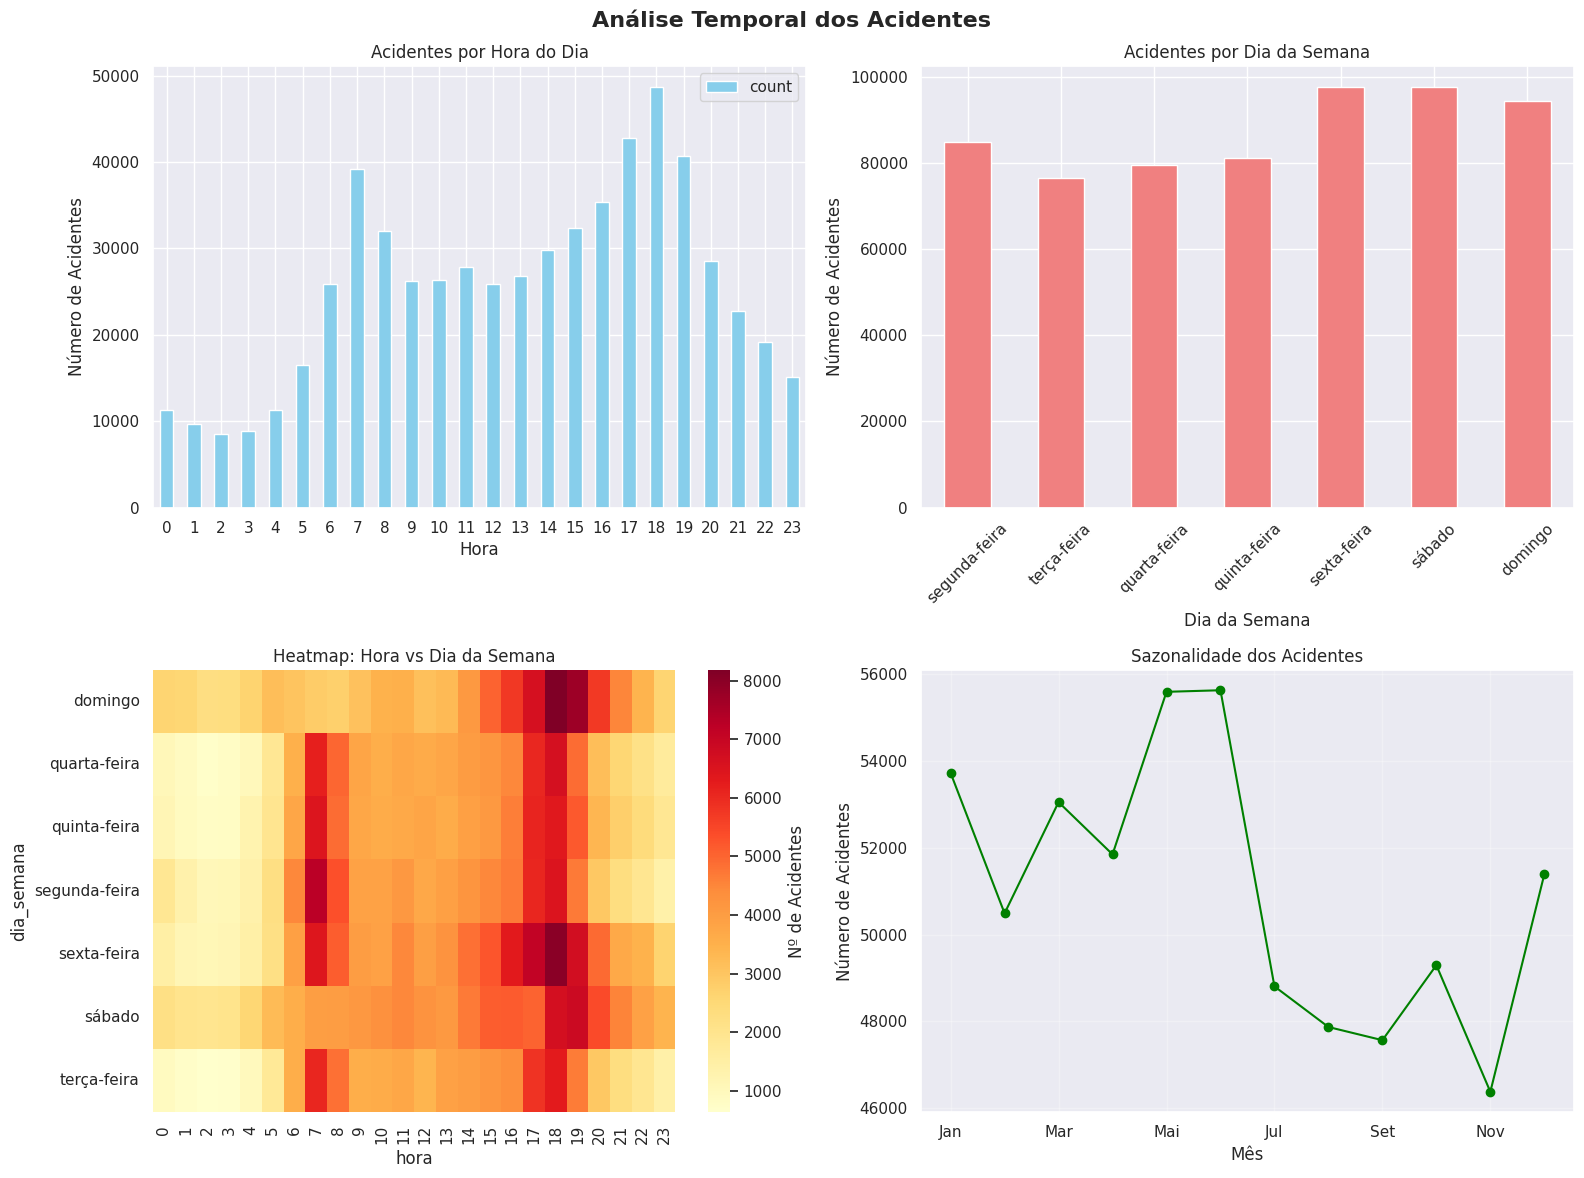

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análise Temporal dos Acidentes', fontsize=16, fontweight='bold')

# 1. Acidentes por hora
if 'hora' in df_acidentes.columns:

    # Série para cálculos
    acidentes_hora_series = df_acidentes.groupby('hora').size()

    # DataFrame para plot
    acidentes_hora_df = acidentes_hora_series.reset_index(name='count')

    # Plot correto
    acidentes_hora_df.plot(kind='bar', x='hora', y='count', ax=axes[0,0], color='skyblue')
    axes[0,0].set_title('Acidentes por Hora do Dia')
    axes[0,0].set_xlabel('Hora')
    axes[0,0].set_ylabel('Número de Acidentes')
    axes[0,0].tick_params(axis='x', rotation=0)

    # Top 3 horários mais perigosos (usando a série)
    top_horas = acidentes_hora_series.nlargest(3)

    print("🚨 Horários mais perigosos:")
    for hora, qtd in top_horas.items():
        print(f"   • {hora:02d}:00h — {qtd:,} acidentes")

# 2. Acidentes por dia da semana
if 'dia_semana' in df_acidentes.columns:
    acidentes_dia = df_acidentes['dia_semana'].value_counts()
    ordem_dias = ['segunda-feira','terça-feira','quarta-feira','quinta-feira','sexta-feira','sábado','domingo']
    acidentes_dia = acidentes_dia.reindex([d for d in ordem_dias if d in acidentes_dia.index])

    acidentes_dia.plot(kind='bar', ax=axes[0,1], color='lightcoral')
    axes[0,1].set_title('Acidentes por Dia da Semana')
    axes[0,1].set_xlabel('Dia da Semana')
    axes[0,1].set_ylabel('Número de Acidentes')
    axes[0,1].tick_params(axis='x', rotation=45)

# 3. Heatmap hora vs dia da semana
if 'hora' in df_acidentes.columns and 'dia_semana' in df_acidentes.columns:
    heatmap_data = df_acidentes.groupby(['dia_semana','hora']).size().unstack(fill_value=0)
    sns.heatmap(heatmap_data, ax=axes[1,0], cmap='YlOrRd', cbar_kws={'label': 'Nº de Acidentes'})
    axes[1,0].set_title('Heatmap: Hora vs Dia da Semana')

# 4. Acidentes por mês
if 'mes' in df_acidentes.columns:
    acidentes_mes = df_acidentes['mes'].value_counts().sort_index()
    meses = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']
    acidentes_mes.index = [meses[i-1] for i in acidentes_mes.index]

    acidentes_mes.plot(kind='line', ax=axes[1,1], marker='o', color='green')
    axes[1,1].set_title('Sazonalidade dos Acidentes')
    axes[1,1].set_xlabel('Mês')
    axes[1,1].set_ylabel('Número de Acidentes')
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Top BRs com mais acidentes (id unico)


🚨 TOP 10 BRs COM MAIS ACIDENTES:
    1. BR-101: 107,868 acidentes
    2. BR-116: 94,303 acidentes
    3. BR-40: 28,116 acidentes
    4. BR-381: 27,620 acidentes
    5. BR-153: 22,742 acidentes
    6. BR-163: 19,901 acidentes
    7. BR-364: 19,174 acidentes
    8. BR-277: 17,819 acidentes
    9. BR-376: 15,418 acidentes
   10. BR-262: 14,635 acidentes

🚨 TOP 10 TRECHOS MAIS PERIGOSOS:
    1. BR-116 (Km 220-230): 3,966 acidentes
    2. BR-101 (Km 200-210): 3,289 acidentes
    3. BR-101 (Km 80-90): 3,206 acidentes
    4. BR-116 (Km 210-220): 3,151 acidentes
    5. BR-101 (Km 60-70): 2,696 acidentes
    6. BR-101 (Km 140-150): 2,641 acidentes
    7. BR-116 (Km 170-180): 2,521 acidentes
    8. BR-101 (Km 40-50): 2,500 acidentes
    9. BR-116 (Km 140-150): 2,437 acidentes
   10. BR-116 (Km 0-10): 2,417 acidentes


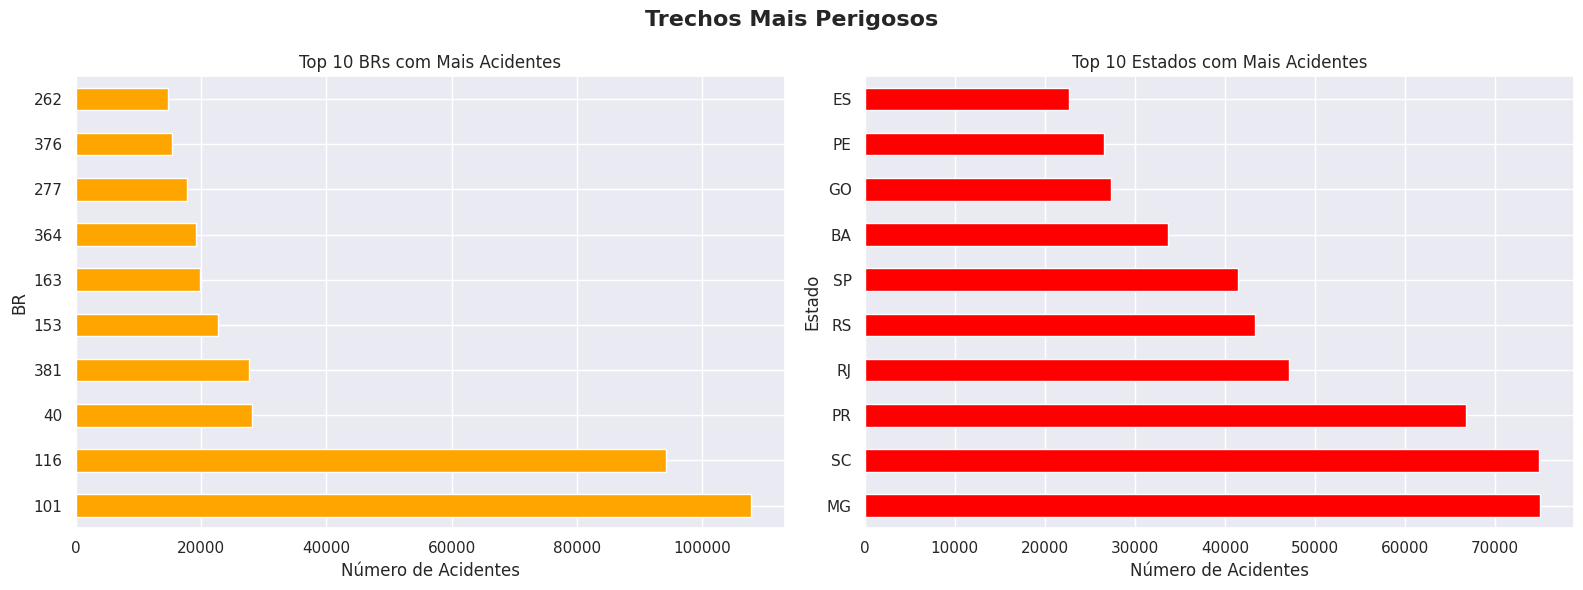

In [6]:
# Converte a coluna 'km' para numérico
if 'km' in df_acidentes.columns:
    df_acidentes['km'] = pd.to_numeric(df_acidentes['km'], errors='coerce')

# Limpa BRs (remove pontos, texto, etc.)
if 'br' in df_acidentes.columns:
    df_acidentes['br'] = df_acidentes['br'].astype(str).str.extract(r'(\d+)')

# Top BRs
if 'br' in df_acidentes.columns:
    acidentes_br = df_acidentes['br'].value_counts().head(10)
    print("\n🚨 TOP 10 BRs COM MAIS ACIDENTES:")
    for i, (br, qtd) in enumerate(acidentes_br.items(), 1):
        print(f"   {i:2d}. BR-{br}: {qtd:,} acidentes")

# Trechos perigosos
if 'br' in df_acidentes.columns and 'km' in df_acidentes.columns:
    df_km_validos = df_acidentes.dropna(subset=['km']).copy()

    df_km_validos['km_faixa'] = (df_km_validos['km'] // 10) * 10

    trechos_perigosos = (
        df_km_validos.groupby(['br', 'km_faixa'])
        .size()
        .reset_index(name='acidentes')
        .nlargest(10, 'acidentes')
    )

    print("\n🚨 TOP 10 TRECHOS MAIS PERIGOSOS:")
    for i, row in enumerate(trechos_perigosos.itertuples(), 1):
        br = row.br
        km_inicio = row.km_faixa
        km_fim = km_inicio + 10
        acidentes = row.acidentes
        print(f"   {i:2d}. BR-{br} (Km {km_inicio:.0f}-{km_fim:.0f}): {acidentes:,} acidentes")

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Trechos Mais Perigosos', fontsize=16, fontweight='bold')

acidentes_br.plot(kind='barh', ax=axes[0], color='orange')
axes[0].set_title('Top 10 BRs com Mais Acidentes')
axes[0].set_xlabel('Número de Acidentes')
axes[0].set_ylabel('BR')

if 'uf' in df_acidentes.columns:
    acidentes_uf = df_acidentes['uf'].value_counts().head(10)
    acidentes_uf.plot(kind='barh', ax=axes[1], color='red')
    axes[1].set_title('Top 10 Estados com Mais Acidentes')
    axes[1].set_xlabel('Número de Acidentes')
    axes[1].set_ylabel('Estado')

plt.tight_layout()
plt.show()


# (id total)


🚨 TOP 10 BRs COM MAIS ACIDENTES:
    1. BR-116.0: 249,643 acidentes
    2. BR-101.0: 238,280 acidentes
    3. BR-40.0: 78,297 acidentes
    4. BR-381.0: 76,264 acidentes
    5. BR-364.0: 69,353 acidentes
    6. BR-163.0: 67,839 acidentes
    7. BR-153.0: 62,947 acidentes
    8. BR-277.0: 52,624 acidentes
    9. BR-230.0: 52,049 acidentes
   10. BR-376.0: 43,809 acidentes

🚨 TOP 10 TRECHOS MAIS PERIGOSOS:
   593. BR-116.0 (Km 220-230): 12,375.0 acidentes
   592. BR-116.0 (Km 210-220): 10,061.0 acidentes
   423. BR-101.0 (Km 80-90): 7,669.0 acidentes
   435. BR-101.0 (Km 200-210): 6,928.0 acidentes
   582. BR-116.0 (Km 110-120): 6,796.0 acidentes
   571. BR-116.0 (Km 0-10): 6,478.0 acidentes
   598. BR-116.0 (Km 270-280): 6,465.0 acidentes
   419. BR-101.0 (Km 40-50): 6,186.0 acidentes
   421. BR-101.0 (Km 60-70): 5,950.0 acidentes
   436. BR-101.0 (Km 210-220): 5,604.0 acidentes


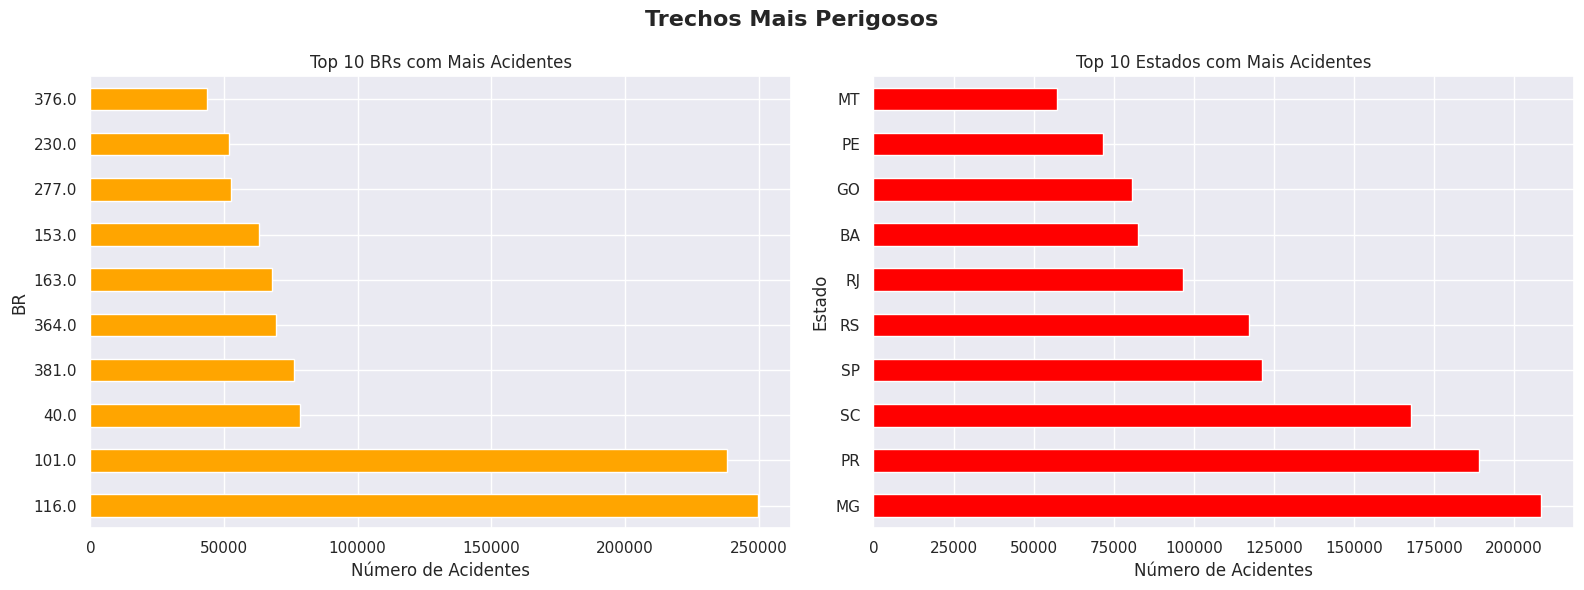

In [7]:
# Converte a coluna 'km' para numérico (forçando erros para NaN)
if 'km' in df.columns:
    df['km'] = pd.to_numeric(df['km'], errors='coerce')

# Top BRs com mais acidentes
if 'br' in df.columns:
    acidentes_br = df['br'].value_counts().head(10)
    print("\n🚨 TOP 10 BRs COM MAIS ACIDENTES:")
    for i, (br, qtd) in enumerate(acidentes_br.items(), 1):
        print(f"   {i:2d}. BR-{br}: {qtd:,} acidentes")

# Top trechos perigosos (BR + faixa de 10 km)
if 'br' in df.columns and 'km' in df.columns:
    # Remove linhas onde 'km' é NaN
    df_km_validos = df.dropna(subset=['km']).copy()
    
    # Cria a faixa de 10 km
    df_km_validos['km_faixa'] = (df_km_validos['km'] // 10) * 10
    trechos_perigosos = df_km_validos.groupby(['br', 'km_faixa']).size().reset_index(name='acidentes')
    trechos_perigosos = trechos_perigosos.nlargest(10, 'acidentes')

    print(f"\n🚨 TOP 10 TRECHOS MAIS PERIGOSOS:")
    for i, row in trechos_perigosos.iterrows():
        br = row['br']
        km_inicio = row['km_faixa']
        km_fim = km_inicio + 10
        acidentes = row['acidentes']
        print(f"   {i+1:2d}. BR-{br} (Km {km_inicio:.0f}-{km_fim:.0f}): {acidentes:,} acidentes")

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Trechos Mais Perigosos', fontsize=16, fontweight='bold')

if 'br' in df.columns:
    acidentes_br.plot(kind='barh', ax=axes[0], color='orange')
    axes[0].set_title('Top 10 BRs com Mais Acidentes')
    axes[0].set_xlabel('Número de Acidentes')
    axes[0].set_ylabel('BR')

if 'uf' in df.columns:
    acidentes_uf = df['uf'].value_counts().head(10)
    acidentes_uf.plot(kind='barh', ax=axes[1], color='red')
    axes[1].set_title('Top 10 Estados com Mais Acidentes')
    axes[1].set_xlabel('Número de Acidentes')
    axes[1].set_ylabel('Estado')

plt.tight_layout()
plt.show()


#  Análise de Condições Fatais (id total)
Analisa condições que levam a acidentes fatais.


📊 ESTATÍSTICAS GERAIS:
   • Total de acidentes: 1,678,326
   • Acidentes fatais: 86,289
   • Taxa de fatalidade: 5.14%

🚨 HORÁRIOS COM MAIOR TAXA DE FATALIDADE:
   • 02:00h - 9.8% de fatalidade
   • 04:00h - 9.2% de fatalidade
   • 01:00h - 8.9% de fatalidade


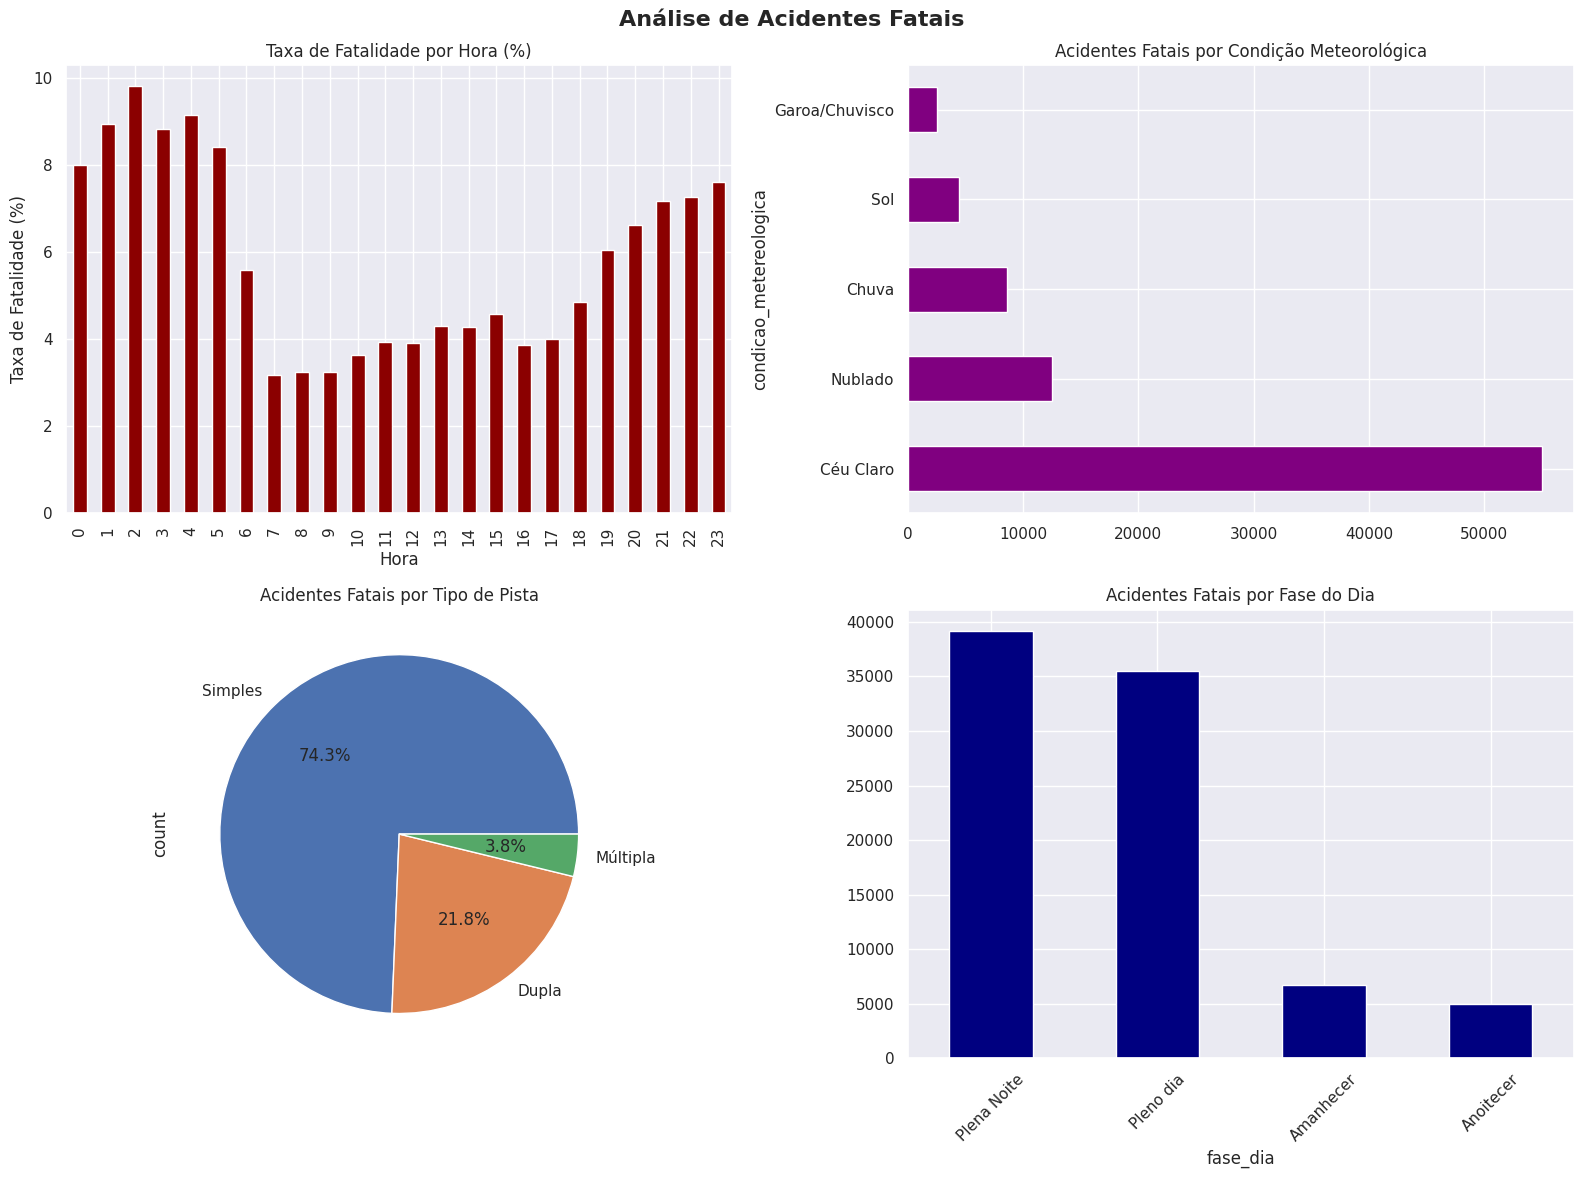

In [8]:
acidentes_fatais = df[df['mortos'] > 0] if 'mortos' in df.columns else pd.DataFrame()

if len(acidentes_fatais) == 0:
    print("❌ Não foi possível identificar acidentes fatais nos dados")
else:
    total_acidentes = len(df)
    total_fatais = len(acidentes_fatais)
    taxa_fatalidade = (total_fatais / total_acidentes) * 100

    print(f"\n📊 ESTATÍSTICAS GERAIS:")
    print(f"   • Total de acidentes: {total_acidentes:,}")
    print(f"   • Acidentes fatais: {total_fatais:,}")
    print(f"   • Taxa de fatalidade: {taxa_fatalidade:.2f}%")

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Análise de Acidentes Fatais', fontsize=16, fontweight='bold')

    # Fatalidade por hora
    if 'hora' in df.columns:
        fatais_hora = acidentes_fatais.groupby('hora').size()
        total_hora = df.groupby('hora').size()
        taxa_hora = (fatais_hora / total_hora * 100).fillna(0)

        taxa_hora.plot(kind='bar', ax=axes[0,0], color='darkred')
        axes[0,0].set_title('Taxa de Fatalidade por Hora (%)')
        axes[0,0].set_xlabel('Hora')
        axes[0,0].set_ylabel('Taxa de Fatalidade (%)')

        top_fatais_hora = taxa_hora.nlargest(3)
        print(f"\n🚨 HORÁRIOS COM MAIOR TAXA DE FATALIDADE:")
        for hora, taxa in top_fatais_hora.items():
            print(f"   • {hora:02d}:00h - {taxa:.1f}% de fatalidade")

    # Fatalidade por condição meteorológica
    if 'condicao_metereologica' in df.columns:
        fatais_clima = acidentes_fatais['condicao_metereologica'].value_counts().head(5)
        fatais_clima.plot(kind='barh', ax=axes[0,1], color='purple')
        axes[0,1].set_title('Acidentes Fatais por Condição Meteorológica')

    # Fatalidade por tipo de pista
    if 'tipo_pista' in df.columns:
        fatais_pista = acidentes_fatais['tipo_pista'].value_counts().head(5)
        fatais_pista.plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%')
        axes[1,0].set_title('Acidentes Fatais por Tipo de Pista')

    # Fatalidade por fase do dia
    if 'fase_dia' in df.columns:
        fatais_fase = acidentes_fatais['fase_dia'].value_counts()
        fatais_fase.plot(kind='bar', ax=axes[1,1], color='navy')
        axes[1,1].set_title('Acidentes Fatais por Fase do Dia')
        axes[1,1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()
